This project is still in development.

> ## Introduction


-A Generic Machine Learning Research On Star Craft II.
-At the end of the research, expected outcome will be a conclusion of different approaches in league prediction.

## Required Packages


In [111]:
import numpy as np
import pandas as pd
##################################################
###################Classsifiers###################
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
###################################################
################Processing and EDA#################
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
##################################################
##############Disable Warnings####################
import warnings  
warnings.filterwarnings('ignore')
##################################################
import os

**Brief information about columns for making easy to work with**


GameID: Unique ID for each game

LeagueIndex: 1-8 for Bronze, Silver, Gold, Diamond, Master, GrandMaster, Professional leagues

Age: Age of each player

HoursPerWeek: Hours spent playing per week

TotalHours: Total hours spent playing

APM: Action per minute

SelectByHotkeys: Number of unit selections made using hotkeys per timestamp

AssignToHotkeys: Number of units assigned to hotkeys per timestamp

UniqueHotkeys: Number of unique hotkeys used per timestamp

MinimapAttacks: Number of attack actions on minimal per timestamp

MinimapRightClicks: Number of right-clicks on minimal per timestamp

NumberOfPACs: Number of PACs per timestamp

GapBetweenPACs: Mean duration between PACs (milliseconds)

ActionLatency: Mean latency from the onset of PACs to their first action (milliseconds)

ActionsInPAC: Mean number of actions within each PAC

TotalMapExplored: Number of 24x24 game coordinate grids viewed by player per timestamp

WorkersMade: Number of SCVs, drones, probes trained per timestamp

UniqueUnitsMade: Unique units made per timestamp

ComplexUnitsMade: Number of ghosts, investors, and high templars trained per timestamp

ComplexAbilityUsed: Abilities requiring specific targeting instructions used per timestamp

MaxTimeStamp: Time stamp of game's last recorded event

In [112]:
#Total playing time is not chosen due to a player can give a long break to 
#his/her playing career, then they can start playing again
relatedColumnsList=["LeagueIndex","Age","HoursPerWeek","APM","SelectByHotkeys",
                    "AssignToHotkeys","UniqueHotkeys",
                    "MinimapAttacks","MinimapRightClicks","NumberOfPACs",
                    "GapBetweenPACs","ActionLatency",
                    "ActionsInPAC","TotalMapExplored","WorkersMade","UniqueUnitsMade",
                    "ComplexUnitsMade","ComplexAbilityUsed","MaxTimeStamp"]
df=pd.read_csv('../input/starcraft.csv')
df = df[relatedColumnsList]
df.dropna()
df = df[df['LeagueIndex']!=8]
df.head(n=6)

,LeagueIndex,Age,HoursPerWeek,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,5,27.0,10.0,143.7180,0.003515,0.000220,0.000055,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,5,23.0,10.0,129.2322,0.003304,0.000259,0.000069,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812
2,4,30.0,10.0,69.9612,0.001101,0.000336,0.000042,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,3,19.0,20.0,107.6016,0.001034,0.000213,0.000011,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,3,32.0,10.0,122.8908,0.001136,0.000327,0.000039,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936
5,2,27.0,6.0,44.4570,0.000978,0.000255,0.000021,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,0.000170,0.000372,0.000064,0.0,0.000000,94032


In [113]:
leagueOne=df[df['LeagueIndex']==1]['Age']
leagueTwo=df[df['LeagueIndex']==2]['Age']
leagueThree=df[df['LeagueIndex']==3]['Age']
leagueFour=df[df['LeagueIndex']==4]['Age']
leagueFive=df[df['LeagueIndex']==5]['Age']
leagueSix=df[df['LeagueIndex']==6]['Age']
leagueSeven=df[df['LeagueIndex']==7]['Age']

In [114]:
df['LeagueIndex'].value_counts(normalize=True)*100

4    24.281437
5    24.131737
6    18.592814
3    16.556886
2    10.389222
1     5.000000
7     1.047904
Name: LeagueIndex, dtype: float64

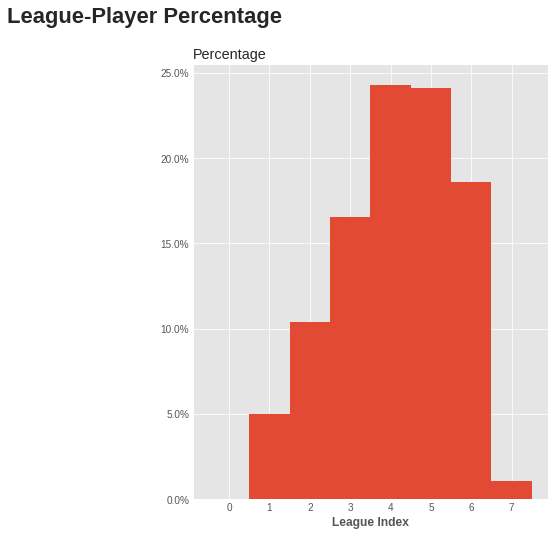

In [115]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, figsize = (14,8))
fig.suptitle('League-Player Percentage', fontweight='bold', fontsize = 22,ha='center')
bins = np.arange(0, 9, 1)
weights = np.ones_like(df['LeagueIndex']) / len(df['LeagueIndex'])
p2 = plt.subplot(1,2,2)
p2.hist(df['LeagueIndex'], bins=bins, weights = weights, align='left')
plt.xlabel('League Index', fontweight='bold')
plt.title('Percentage',loc='left')
yvals = plt.subplot(1,2,2).get_yticks()
plt.subplot(1,2,2).set_yticklabels(['{:3.1f}%'.format(y*100) for y in yvals])
plt.show()

In [116]:
leagues=[leagueOne,leagueTwo,leagueThree,leagueFour,
         leagueFive,leagueSix,leagueSeven]
newLabels=["Bronze", "Silver", "Gold", "Platinum",
           "Diamond", "Master", "Grandmaster"]

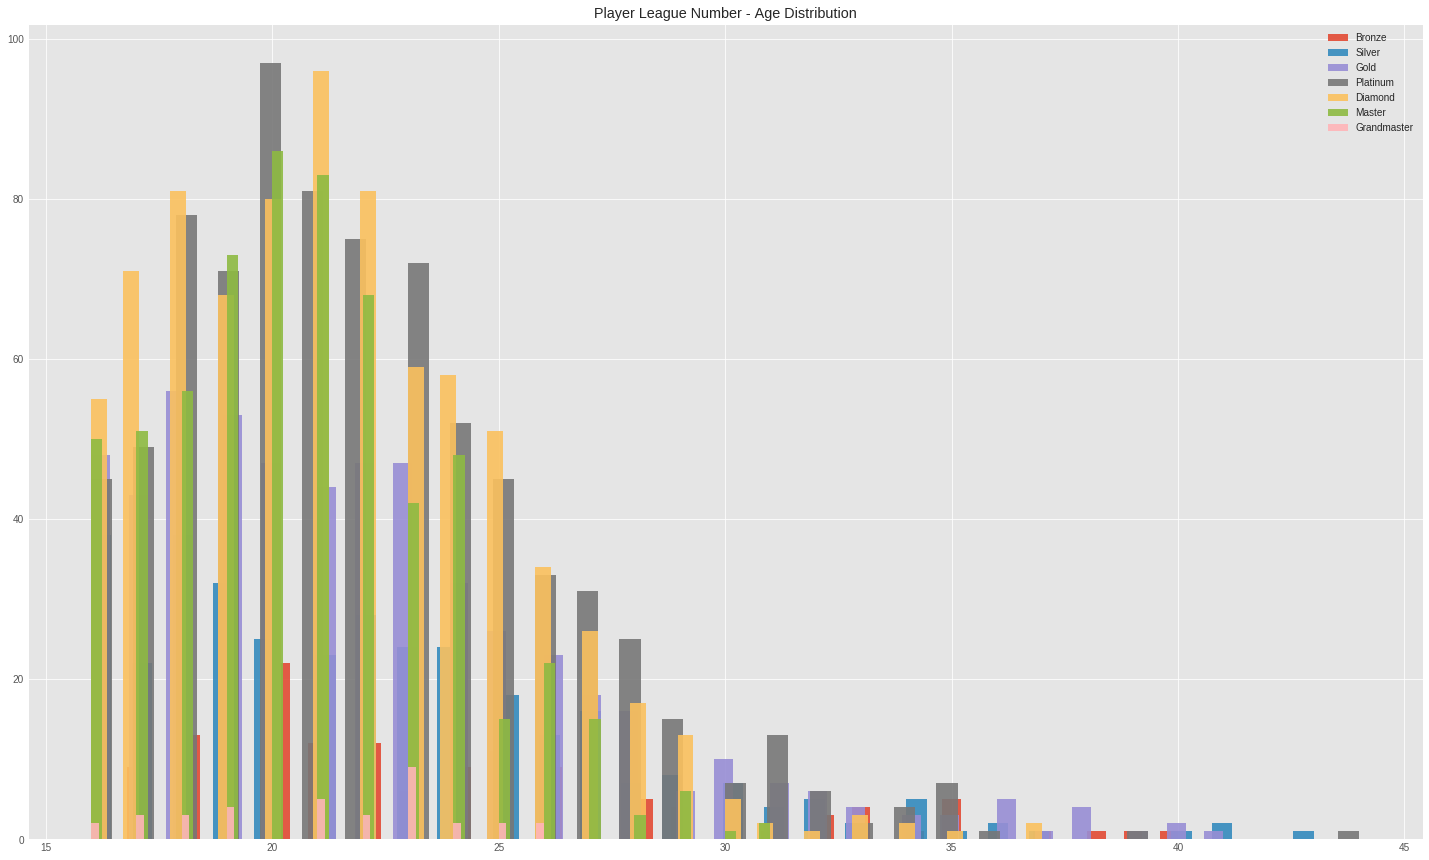

In [117]:
fig=plt.figure(figsize=(25,15))
plt.title("Player League Number - Age Distribution")
for i in range(len(leagues)):
    leagues[i].hist(alpha=0.9,bins=60,label=newLabels[i])
    plt.legend(loc="best")

In [118]:
leagueOne=df[df['LeagueIndex']==1]['APM']
leagueTwo=df[df['LeagueIndex']==2]['APM']
leagueThree=df[df['LeagueIndex']==3]['APM']
leagueFour=df[df['LeagueIndex']==4]['APM']
leagueFive=df[df['LeagueIndex']==5]['APM']
leagueSix=df[df['LeagueIndex']==6]['APM']
leagueSeven=df[df['LeagueIndex']==7]['APM']

In [119]:
leagues=[leagueOne,leagueTwo,leagueThree,leagueFour,
         leagueFive,leagueSix,leagueSeven]

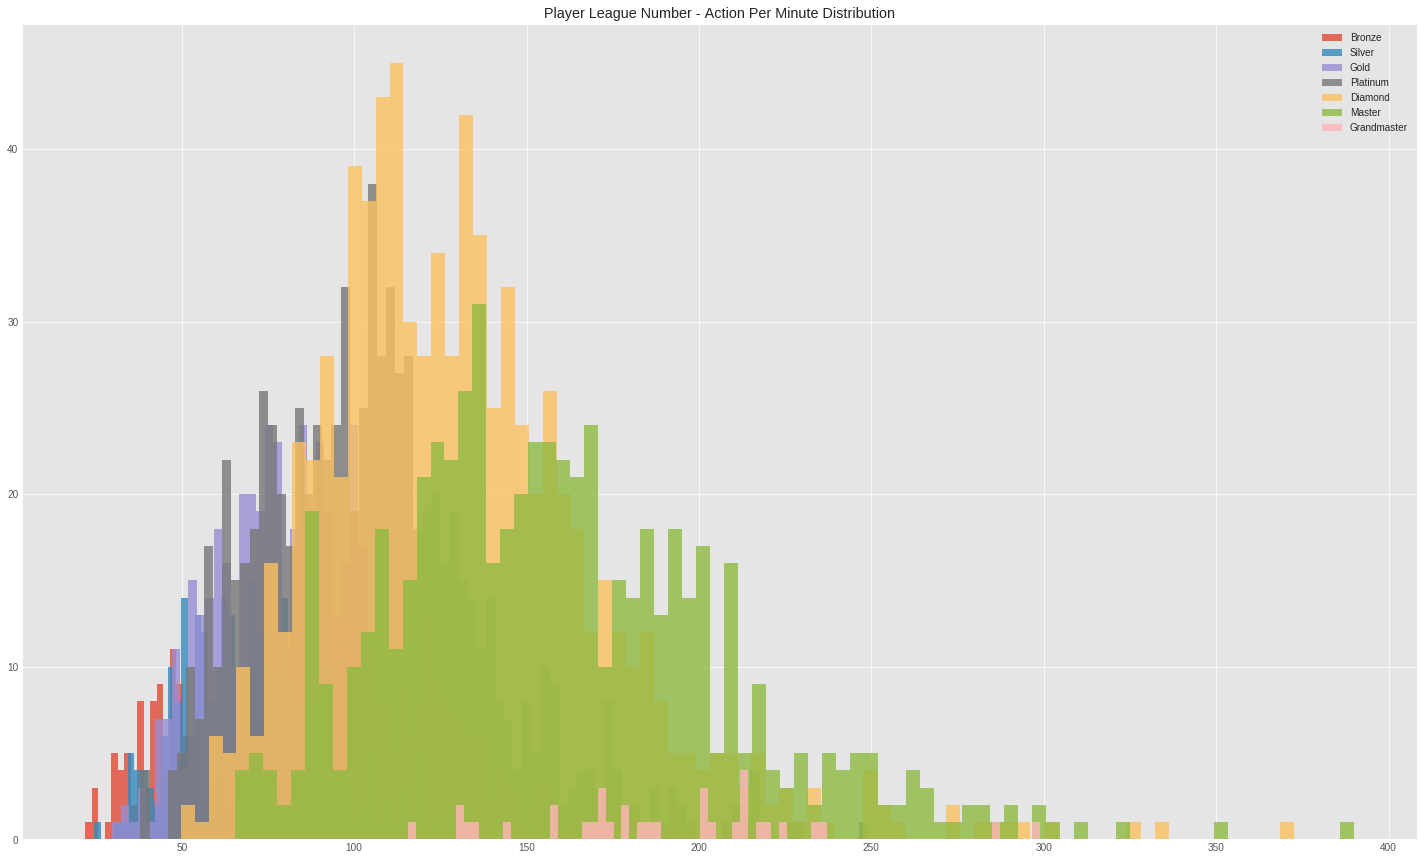

In [120]:
fig=plt.figure(figsize=(25,15))
plt.title("Player League Number - Action Per Minute Distribution")
for i in range(len(leagues)):
    leagues[i].hist(alpha=0.8,bins=80,label=newLabels[i])
    plt.legend(loc="best")

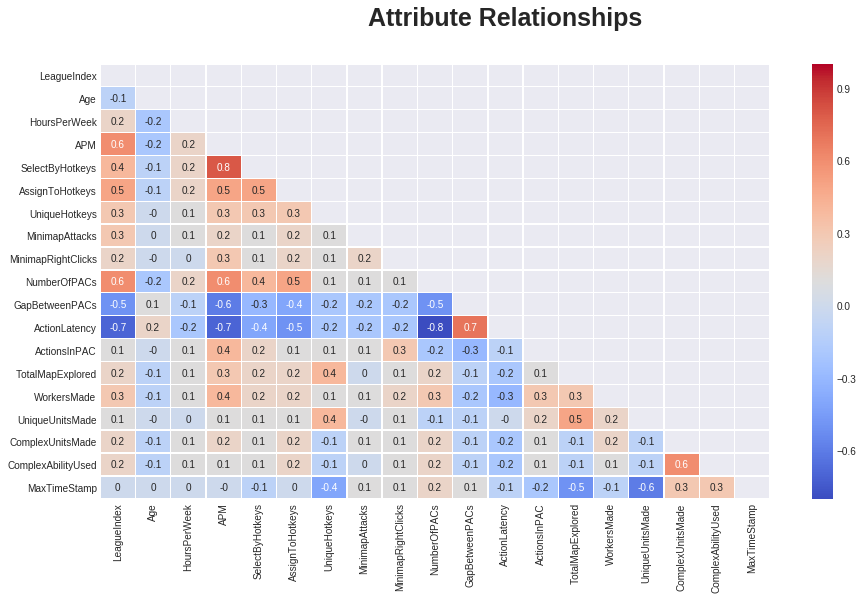

In [121]:
plt.style.use(['seaborn-dark'])
fig, axes = plt.subplots(nrows=1, ncols = 1, figsize = (15,8))
fig.suptitle('Attribute Relationships', fontsize=25, fontweight='bold')
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
r_matrix = df.corr().round(decimals=1)
sns.heatmap(r_matrix, mask=mask, annot=True, fmt='g',
            annot_kws={'size':10},linewidths=.3,cmap='coolwarm')
plt.show()


In [122]:
willBeFocusedColumns = ['APM','SelectByHotkeys', 'AssignToHotkeys',
                        'NumberOfPACs','GapBetweenPACs', 'ActionLatency']

In [123]:
ySelected = df['LeagueIndex']
xSelected = df[willBeFocusedColumns]

In [124]:
xTrain,xTest,yTrain,yTest=train_test_split(xSelected,ySelected,test_size=0.33)

In [125]:
dtc= DecisionTreeClassifier()
dtc.fit(xTrain,yTrain)
yPrediction=dtc.predict(xTest)
print("Decision Tree Confusion Matrix")
cm=confusion_matrix(yTest,yPrediction)
print(cm)
print("Score of Decision Tree: ",dtc.score(xTest,yTest),"\n")

Decision Tree Confusion Matrix
[[17 16 18  7  4  0  0]
 [12 17 31 14 13  2  0]
 [15 31 54 50 21 16  0]
 [ 5 29 60 78 65 27  0]
 [ 3 13 24 76 90 76  1]
 [ 2  4  7 32 68 80 13]
 [ 0  0  1  1  2  7  1]]
Score of Decision Tree:  0.3055303717135086 



In [126]:
gnb=GaussianNB()
gnb.fit(xTrain,yTrain)
yPrediction=gnb.predict(xTest)
print("Naive Bayes Confusion Matrix")
cm=confusion_matrix(yTest,yPrediction)
print(cm)
print("Score of Naive Bayes: ",gnb.score(xTest,yTest),"\n")

Naive Bayes Confusion Matrix
[[ 16  35   6   5   0   0   0]
 [ 11  35  18  21   4   0   0]
 [  3  50  55  50  24   5   0]
 [  0  41  39  97  71  14   2]
 [  0   8  10  81 127  53   4]
 [  0   0   4  20  81  75  26]
 [  0   0   0   0   3   7   2]]
Score of Naive Bayes:  0.36899365367180414 



In [127]:
svmTrial = svm.LinearSVC()
svmTrial = svmTrial.fit(xTrain,yTrain)
yPrediction = svmTrial.predict(xTest)
print("Support Vector Machine Confusion Matrix")
cm=confusion_matrix(yTest,yPrediction)
print(cm)
print("Score of Support Vector Machine: ",svmTrial.score(xTest,yTest),"\n")

Support Vector Machine Confusion Matrix
[[  0  50   0  12   0   0   0]
 [  0  50   0  39   0   0   0]
 [  0  78   0 102   7   0   0]
 [  0  61   0 180  23   0   0]
 [  0  12   0 189  82   0   0]
 [  0   4   0  74 128   0   0]
 [  0   0   0   3   9   0   0]]
Score of Support Vector Machine:  0.2828649138712602 



In [128]:
rfc=RandomForestClassifier()
rfc.fit(xTrain,yTrain)
yPrediction=rfc.predict(xTest)
print("Random Forest Confusion Matrix")
cm=confusion_matrix(yTest,yPrediction)
print(cm)
print("Score of Random Forest: ",rfc.score(xTest,yTest),"\n")

Random Forest Confusion Matrix
[[ 20  21  11   8   2   0   0]
 [  8  29  23  20   9   0   0]
 [ 10  30  45  71  26   5   0]
 [  4  32  45  94  67  22   0]
 [  4  11  17  84 106  61   0]
 [  1   1   8  39  72  82   3]
 [  0   0   0   0   3   9   0]]
Score of Random Forest:  0.34088848594741616 



###########################################################################
######################## ONE VERSUS ALL CLASSIFICATION ####################
###########################################################################

In [129]:
def CalculateOneVsAll(targetRank):
    oneVsAllDataFrame = df.copy(deep=True)
    leagueIndexes=[1,2,3,4,5,6,7]
    if targetRank in leagueIndexes:
        leagueIndexes[targetRank-1]=0
    for i in range(len(oneVsAllDataFrame.index)):  
        if(oneVsAllDataFrame['LeagueIndex'][i]!=targetRank):
            for k in range(len(leagueIndexes)):
                oneVsAllDataFrame['LeagueIndex'].replace(leagueIndexes[k],0,inplace=True)
    
    OVAWillBeFocusedColumns = ['APM','SelectByHotkeys', 'AssignToHotkeys',
                            'NumberOfPACs','GapBetweenPACs', 'ActionLatency']
    yOVASelected = oneVsAllDataFrame['LeagueIndex']
    xOVASelected = oneVsAllDataFrame[OVAWillBeFocusedColumns]        
            
    xOVATrain,xOVATest,yOVATrain,yOVATest=train_test_split(xOVASelected,
                                                           yOVASelected,
                                                           test_size=0.33)  

    ######################DecisionTreeClassifier One vs All####################
    dtcOVA=DecisionTreeClassifier()
    dtcOVA.fit(xOVATrain,yOVATrain)
    yOVAPrediction=dtcOVA.predict(xOVATest)
    print("One Versus All Decision Tree Confusion Matrix")
    cmOVA=confusion_matrix(yOVATest,yOVAPrediction)
    print(cmOVA)
    print(yOVAPrediction)
    print("OVA Score of Decision Tree: ",dtcOVA.score(xOVATest,yOVATest),"\n")
    f1ScoreCalculation(yOVATest,yOVAPrediction)
    precisionScoreCalculation(yOVATest,yOVAPrediction)
    recallScoreCalculation(yOVATest,yOVAPrediction)
    ######################Naive Bayes Classifier One vs All####################
    gnbOVA=GaussianNB()
    gnbOVA.fit(xOVATrain,yOVATrain)
    yOVAPrediction=gnbOVA.predict(xOVATest)
    print("One Versus All Naive Bayes Confusion Matrix")
    cmOVA=confusion_matrix(yOVATest,yOVAPrediction)
    print(cmOVA)
    print(yOVAPrediction)
    print("OVA Score of Naive Bayes Classifier: ",gnbOVA.score(xOVATest,yOVATest),"\n")
    f1ScoreCalculation(yOVATest,yOVAPrediction)
    precisionScoreCalculation(yOVATest,yOVAPrediction)
    recallScoreCalculation(yOVATest,yOVAPrediction)
    ######################Support Vector Machine One vs All####################
    svmOVA = svm.LinearSVC()
    svmOVA = svmOVA.fit(xOVATrain,yOVATrain)
    yOVAPrediction = svmOVA.predict(xOVATest)
    print("One Versus All Support Vector Machine Confusion Matrix")
    cmOVA=confusion_matrix(yOVATest,yOVAPrediction)
    print(cmOVA)
    print(yOVAPrediction)
    print("OVA Score of Support Vector Machine: ",svmOVA.score(xOVATest,yOVATest),
          "\n")
    f1ScoreCalculation(yOVATest,yOVAPrediction)
    precisionScoreCalculation(yOVATest,yOVAPrediction)
    recallScoreCalculation(yOVATest,yOVAPrediction)
    #########################RandomForestClassifier One vs All#################
    rfcOVA=RandomForestClassifier()
    rfcOVA.fit(xOVATrain,yOVATrain)
    yOVAPrediction=rfcOVA.predict(xOVATest)
    print("One Versus All Random Forest Confusion Matrix")
    cmOVA=confusion_matrix(yOVATest,yOVAPrediction)
    print(cmOVA)
    print(yOVAPrediction)
    f1ScoreCalculation(yOVATest,yOVAPrediction)
    precisionScoreCalculation(yOVATest,yOVAPrediction)
    recallScoreCalculation(yOVATest,yOVAPrediction)

In [130]:
def f1ScoreCalculation(test,prediction):
    print("Macro F1: ",f1_score(test,prediction,average='macro'))
    print("Micro F1: ",f1_score(test,prediction,average='micro'))
    print("Weighted F1: ",f1_score(test,prediction,average='weighted'))
    print(f1_score(test,prediction,average=None),"\n")

#### The F-measure can be interpreted as a weighted harmonic mean of the precision and recall. A measure reaches its best value at 1 and its worst score at 0.

In [131]:
def precisionScoreCalculation(test,prediction):
    print("Macro Precision: ",precision_score(test,prediction,average='macro'))
    print("Micro Precision: ",precision_score(test,prediction,average='micro'))
    print("Weighted Precision: ",precision_score(test,prediction,average='weighted'))
    print(precision_score(test,prediction,average=None),"\n")

#### Precision is defined as the number of true positives over the number of true positives plus the number of false positives.

In [132]:
def recallScoreCalculation(test,prediction):
    print("Macro Recall: ",recall_score(test,prediction,average='macro'))
    print("Micro Recall: ",recall_score(test,prediction,average='micro'))
    print("Weighted Recall: ",recall_score(test,prediction,average='weighted'))
    print(recall_score(test,prediction,average=None),"\n")

#### Recall is defined as the number of true positives over the number of true positives plus the number of false negatives.

In [133]:
notifier=["-----ONE VERSUS ALL FOR BRONZE LEAGUE PREDICTIONS-----\n",
          "-----ONE VERSUS ALL FOR SILVER LEAGUE PREDICTIONS-----\n",
          "-----ONE VERSUS ALL FOR GOLD LEAGUE PREDICTIONS-----\n",
          "-----ONE VERSUS ALL FOR PLATINIUM LEAGUE PREDICTIONS-----\n",
          "-----ONE VERSUS ALL FOR DIAMOND LEAGUE PREDICTIONS-----\n",
          "-----ONE VERSUS ALL FOR MASTER LEAGUE PREDICTIONS-----\n",
          "-----ONE VERSUS ALL FOR GRAND MASTER LEAGUE PREDICTIONS-----\n"]
endNotifier=["++++ End of Bronze league predictions++++\n",
          "++++ End of Silver league predictions++++\n",
          "++++ End of Gold league predictions++++\n",
          "++++ End of Platinium league predictions++++\n",
          "++++ End of Diamond league predictions++++\n",
          "++++ End of Master league predictions++++\n",
          "++++ End of Grand Master league predictions++++\n"]
j=1        
while j<=7:
    print(notifier[j-1])
    CalculateOneVsAll(j)
    print(endNotifier[j-1])
    j+=1

-----ONE VERSUS ALL FOR BRONZE LEAGUE PREDICTIONS-----

One Versus All Decision Tree Confusion Matrix
[[995  45]
 [ 45  18]]
[0 0 0 ... 0 0 0]
OVA Score of Decision Tree:  0.9184043517679057 

Macro F1:  0.6212225274725275
Micro F1:  0.9184043517679058
Weighted F1:  0.9184043517679057
[0.95673077 0.28571429] 

Macro Precision:  0.6212225274725275
Micro Precision:  0.9184043517679057
Weighted Precision:  0.9184043517679057
[0.95673077 0.28571429] 

Macro Recall:  0.6212225274725275
Micro Recall:  0.9184043517679057
Weighted Recall:  0.9184043517679057
[0.95673077 0.28571429] 

One Versus All Naive Bayes Confusion Matrix
[[962  78]
 [ 24  39]]
[0 0 0 ... 0 0 0]
OVA Score of Naive Bayes Classifier:  0.9075249320036265 

Macro F1:  0.6914939124712076
Micro F1:  0.9075249320036265
Weighted F1:  0.920163799885263
[0.94965449 0.43333333] 

Macro Precision:  0.6544962812711291
Micro Precision:  0.9075249320036265
Weighted Precision:  0.9389715307137642
[0.97565923 0.33333333] 

Macro Recall:  

One Versus All Decision Tree Confusion Matrix
[[654 195]
 [171  83]]
[0 5 5 ... 0 0 5]
OVA Score of Decision Tree:  0.6681776971894833 

Macro F1:  0.5466960411782145
Micro F1:  0.6681776971894833
Weighted F1:  0.6732837562862792
[0.78136201 0.31203008] 

Macro Precision:  0.5456442119032047
Micro Precision:  0.6681776971894833
Weighted Precision:  0.6789301785308751
[0.79272727 0.29856115] 

Macro Recall:  0.5485448373723603
Micro Recall:  0.6681776971894833
Weighted Recall:  0.6681776971894833
[0.77031802 0.32677165] 

One Versus All Naive Bayes Confusion Matrix
[[558 291]
 [106 148]]
[5 5 5 ... 0 5 5]
OVA Score of Naive Bayes Classifier:  0.6400725294650952 

Macro F1:  0.5823679148199967
Micro F1:  0.6400725294650952
Weighted F1:  0.666109977536664
[0.7376074  0.42712843] 

Macro Precision:  0.5887456431649147
Micro Precision:  0.6400725294650952
Weighted Precision:  0.7244767424920585
[0.84036145 0.33712984] 

Macro Recall:  0.6199604908043739
Micro Recall:  0.6400725294650952
Wei